<img src="quoralogo.jpg" width="1000" height="500">

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs Similarity </h1>

### Problem Statement

#### Identify the Question asked on Quora is Duplicate of Questions which are already asked...

Eg: 1 

i.e. Q1: Is Johnny Depp a wife beater?

     Q2: Does johnny depp beats his wife ?
     
    Ans : Simillar
    
Eg 2:

i.e. Q1: Who is the highest paid actor in Hollywood currently?

     Q2: Who is the highest paid actor currently?
     
    Ans: Not Simillar

### Our Task

.We have to Determine the questions asked are Duplicates or not.

.If eg: Q1 and Q2 are Duplicates then we can transfer the Answers from Q1 to Q2 which are already given by people.

### Objective and Constraints

1: The Cost of Misclassification can be very high (ie: if Q1 & Q2 have slightly diffrent meaning but we declared it as Duplicate then all the answer from Q1 will be transferd to Q2) and this will cause misclassification

2: So in order to avoid this problem we will use Probablity on pair of questions:

        i.e. Q1 &  Q2   Prob(Q1 Similarity Q2)......>> 0 to 1
        let say we got P(Q1 ~ Q2) > 0.98 .....>>> This is our Threshold 

## Source : https://www.kaggle.com/c/quora-question-pairs

### Load Datasets

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Data Overview

a) Train.csv ----> 5 Columns (qid1, qid2, question1, question2, is_duplicate)

b) .shape ---> (404290, 6)
 
c) .info() ---> Input--->[qid1, qid2 [integer], question1, question2 [object]]

           Output---> [is_duplicate -> binary -> (0,1)]

### Type of Machine Learning Problem

yi ----> 0 -----> not_duplicate

      1-----> is_duplicate  (Binary Classification) 

### Performance Metric

Depends on problem statement, here P(Q1 ~ Q2)

Evene though it has binary classification (0,1) , but we dont treat it as binary bcoz of misclassification so we will instead use [probability threshold]

So Performance metric : 1:Log Loss (works on actual Probablity Scores)
        
                    2: Binary Confusion matrix

### 1. Exploratory Data Analysis

In [7]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Distribution of Output

<AxesSubplot:xlabel='is_duplicate'>

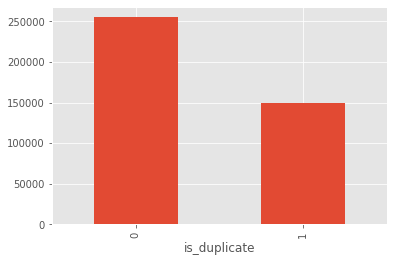

In [12]:
df.groupby('is_duplicate')['id'].count().plot.bar()

### Q1] Out of 100 % , how much % are non_duplicate (0) and is_duplicate (1) ?

In [18]:
print('Questions which are not simillar i.e (non_duplicate==0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100,2)))
print('Questions which are simillar i.e (is_duplicate==1):\n   {}%'.format(round(df['is_duplicate'].mean()*100,2)))

Questions which are not simillar i.e (non_duplicate==0):
   63.08%
Questions which are simillar i.e (is_duplicate==1):
   36.92%


### Q2] Find Total Number of Unique Questions

i.e. There may be the pair of questions such as 
     
     Q3  Q2   1
     Q4  Q1   0
     Q2  Q3   0  
     Q1  Q3   0
     Q4  Q2   1
     
.... WE have 4 unique questions out of 5 pairs ..(Q1,Q2,Q3,Q4)

In [23]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
print('Total number of unique questions:',unique_qs)

Total number of unique questions: 537933


### Q3] No of unique question appear more than 1 time

In [28]:
ques_more_than_one = np.sum(qids.value_counts() > 1)
print('Question appeared more than 1 time:',ques_more_than_one)

Question appeared more than 1 time: 111780


### Q4] Max number of time Single ques repeated 

In [31]:
print('Max number of times single ques repeated:',max(qids.value_counts()))

Max number of times single ques repeated: 157


### Q5] Unique Ques V/S Repeated Ques

<BarContainer object of 2 artists>

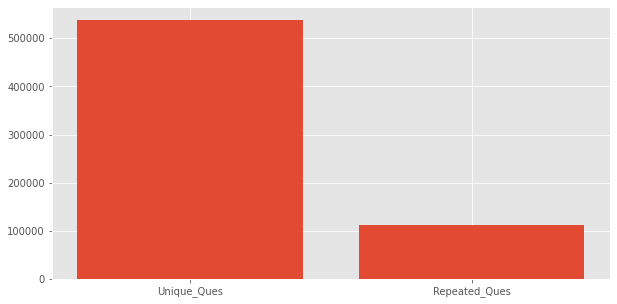

In [33]:
x = ['Unique_Ques','Repeated_Ques']
y = [unique_qs,ques_more_than_one]
plt.figure(figsize=(10,5))
plt.bar(x,y)

### Q6] Number of Occurences of each questions

Text(0, 0.5, 'Number of questions')

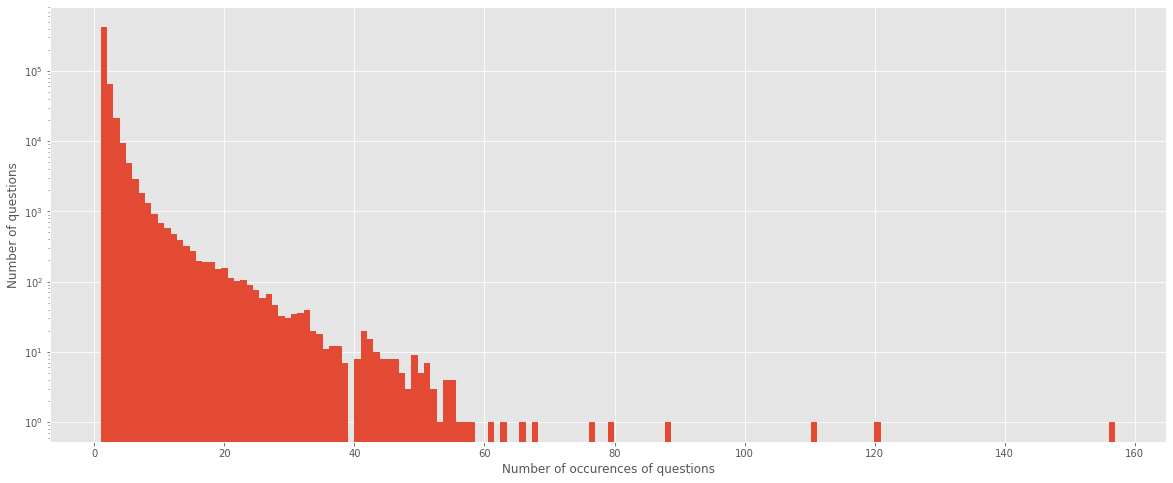

In [40]:
plt.figure(figsize=(20,8))

plt.hist(qids.value_counts(),bins = 160)

plt.yscale('log', nonpositive='clip')

plt.xlabel('Number of occurences of questions')

plt.ylabel('Number of questions')

### Check null values

In [42]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [43]:
df = df.fillna('')

In [44]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [45]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


### 2. Basic feature extractions  (Before cleaning)

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - i.e. number of times ques1 and ques2 occurs in whole dataset
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - i.e. len of q1 and q2 i.e. my name is xyz = [14] inclding spaces 
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [46]:
df1 = df.copy()

In [57]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda x: len(x.split(' ')))
df['q2_n_words'] = df['question2'].apply(lambda x: len(x.split(' ')))

In [59]:
def normalized_words_common(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return 1.0 * len(w1 & w2)
df['word_common'] = df.apply(normalized_words_common,axis = 1)

In [61]:
def normalized_words_total(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return 1.0 * (len(w1) + len(w2))
df['word_total'] = df.apply(normalized_words_total,axis = 1)

In [63]:
def normalized_words_share(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_words_share,axis = 1)

In [65]:
df['freq_q1+freq_q2'] = df['freq_qid1'] + df['freq_qid2']
df['freq_q1-freq_q2'] = df['freq_qid1'] - df['freq_qid2']

In [66]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0


### 2.1 Analysis on Extracted Features

### <h1 style="text-align:center;font-size:30px;" > Violin Plot </h1>

<img src="violin_plot2.jpg" width="600" height="300">

### word_share

c:\users\nihar j\anaconda3\envs\eda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nihar j\anaconda3\envs\eda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


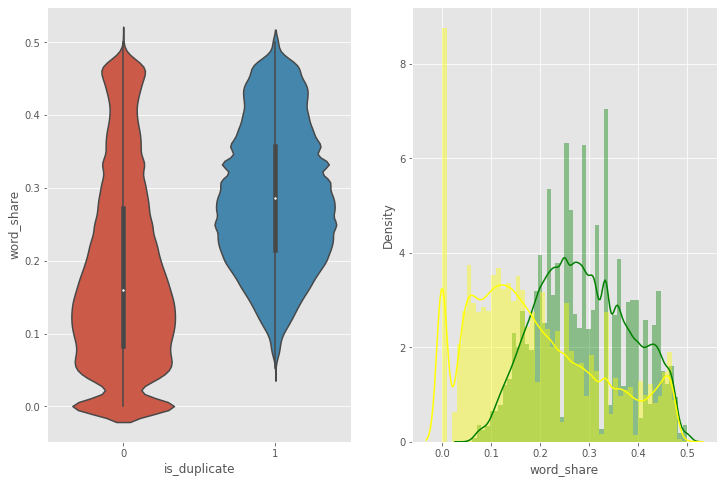

In [74]:
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate',y = 'word_share',data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'green')
sns.distplot(df[df['is_duplicate']== 0.0]['word_share'][0:], label = '0',color = 'yellow')

plt.show()

#### Observations: Questions which are duplicate (is_duplicate == 1) has higher density (in green color) of words share that means higher number of words shared has high probability to be similar

### word_common

c:\users\nihar j\anaconda3\envs\eda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\nihar j\anaconda3\envs\eda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


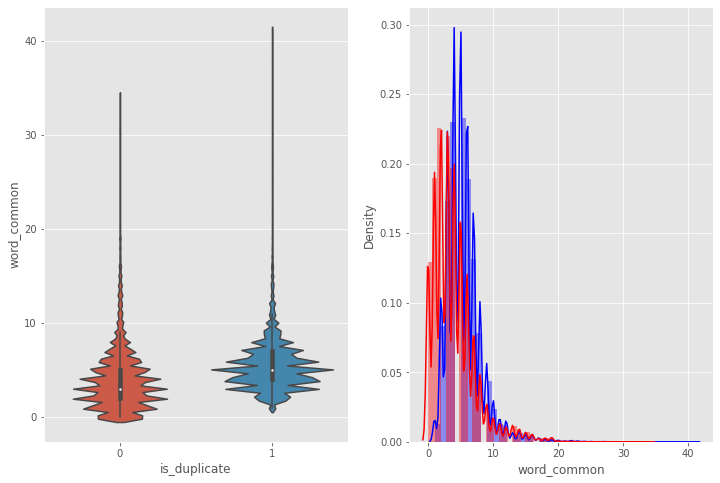

In [73]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate',y = 'word_common',data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_common'][0:] , label = "1", color = 'blue')
sns.distplot(df[df['is_duplicate']== 0.0]['word_common'][0:], label = '0',color = 'red')

plt.show()

### Exporting File to csv

In [75]:
df.to_csv('df.csv',index = 'False')